<a href="https://colab.research.google.com/github/BartBroux/BartBroux/blob/main/rollend_gemiddelde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Package imports
import numpy as np                                  # "Scientific computing"
import pandas as pd                                 # Dataframe

import scipy.stats as stats                         # Statistical tests
from sklearn.linear_model import LinearRegression   # Linear regression model

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz

In [9]:
from datetime import datetime, timedelta

# Calculate the timestamp for today - 1 day
end_date = datetime.now() - timedelta(days=1)
end_timestamp = int(end_date.timestamp())

# Update the URL with the new end timestamp
url = f"https://query1.finance.yahoo.com/v7/finance/download/IWDA.AS?period1=1253923200&period2={end_timestamp}&interval=1d&events=history&includeAdjustedClose=true"

url

'https://query1.finance.yahoo.com/v7/finance/download/IWDA.AS?period1=1253923200&period2=1722777021&interval=1d&events=history&includeAdjustedClose=true'

In [15]:
# Import the CSV-file in a DataFrame, parse the Date column as a date and set it as the index.
data = pd.read_csv(url, delimiter = ",", parse_dates=['Date']).set_index(['Date'])
#  We will only use the variable Close, so you can drop all other variables.
data = data[['Close']]
df = data.iloc[np.r_[0:1, -2:0]]
print (df)

                Close
Date                 
2009-09-28  16.990000
2024-08-01  94.455002
2024-08-02  90.665001


Text(0, 0.5, 'Close')

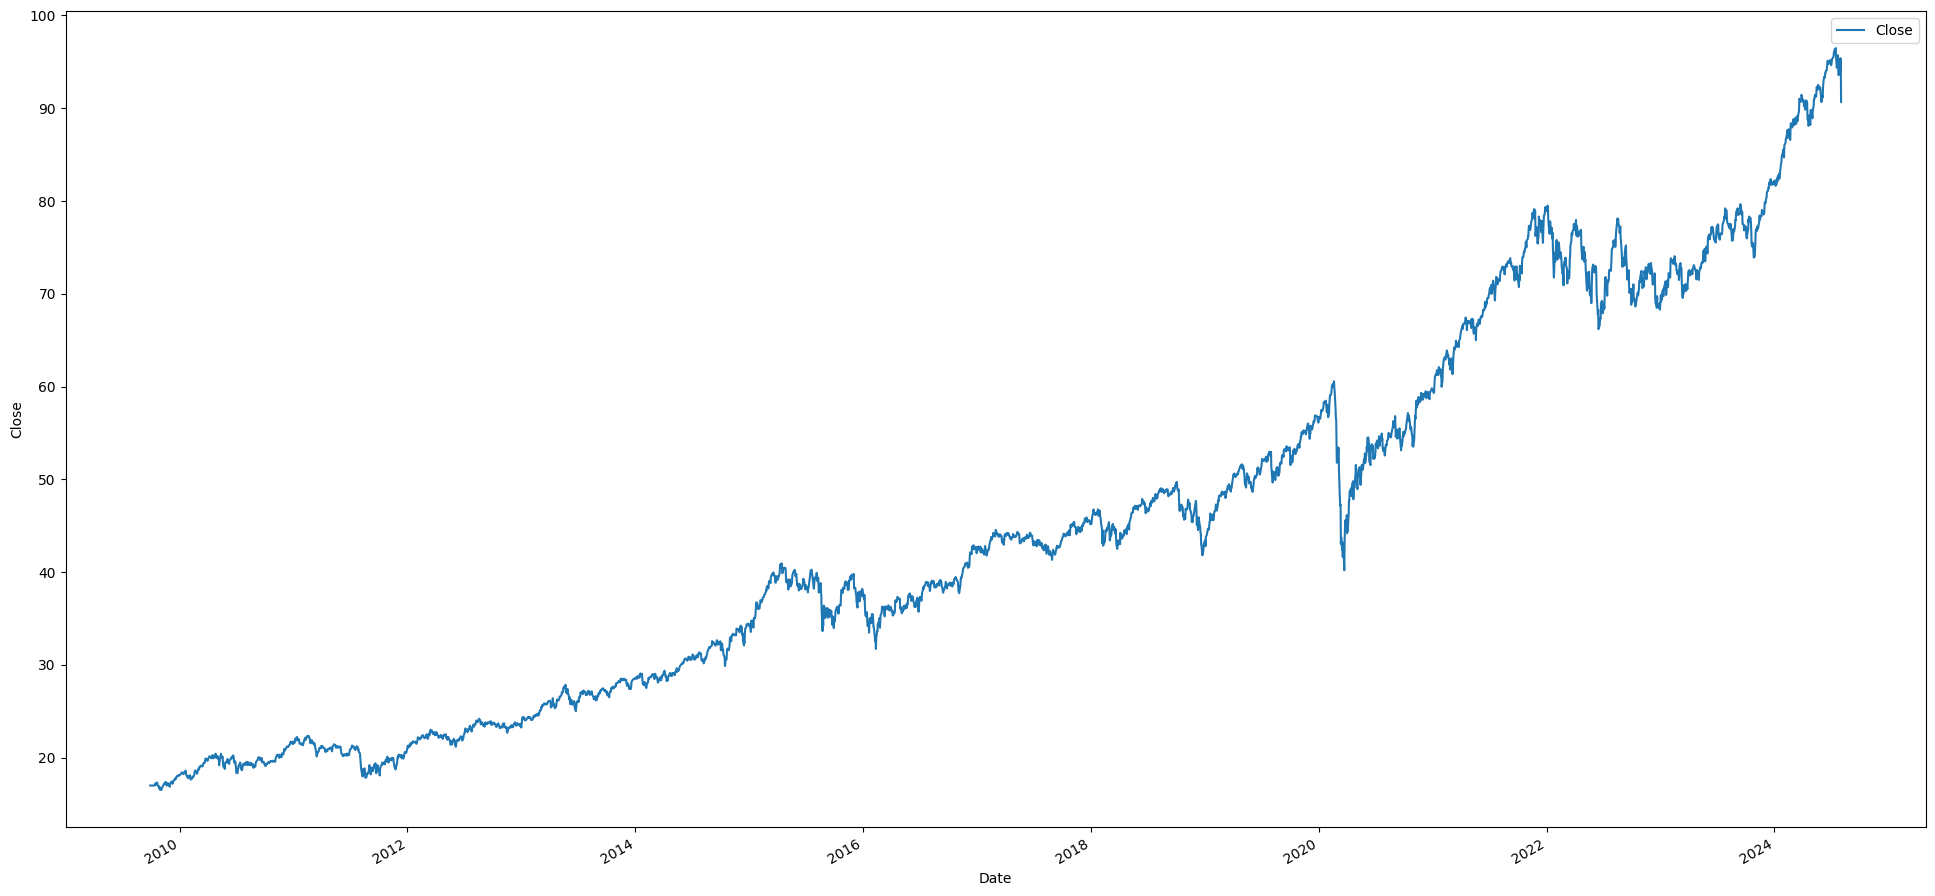

In [12]:
# Plot the time series to get an idea about the evolution over time of the S&P500 index.
data.plot(y= data.columns[0], figsize= [24,12])
plt.ylabel(data.columns[0])

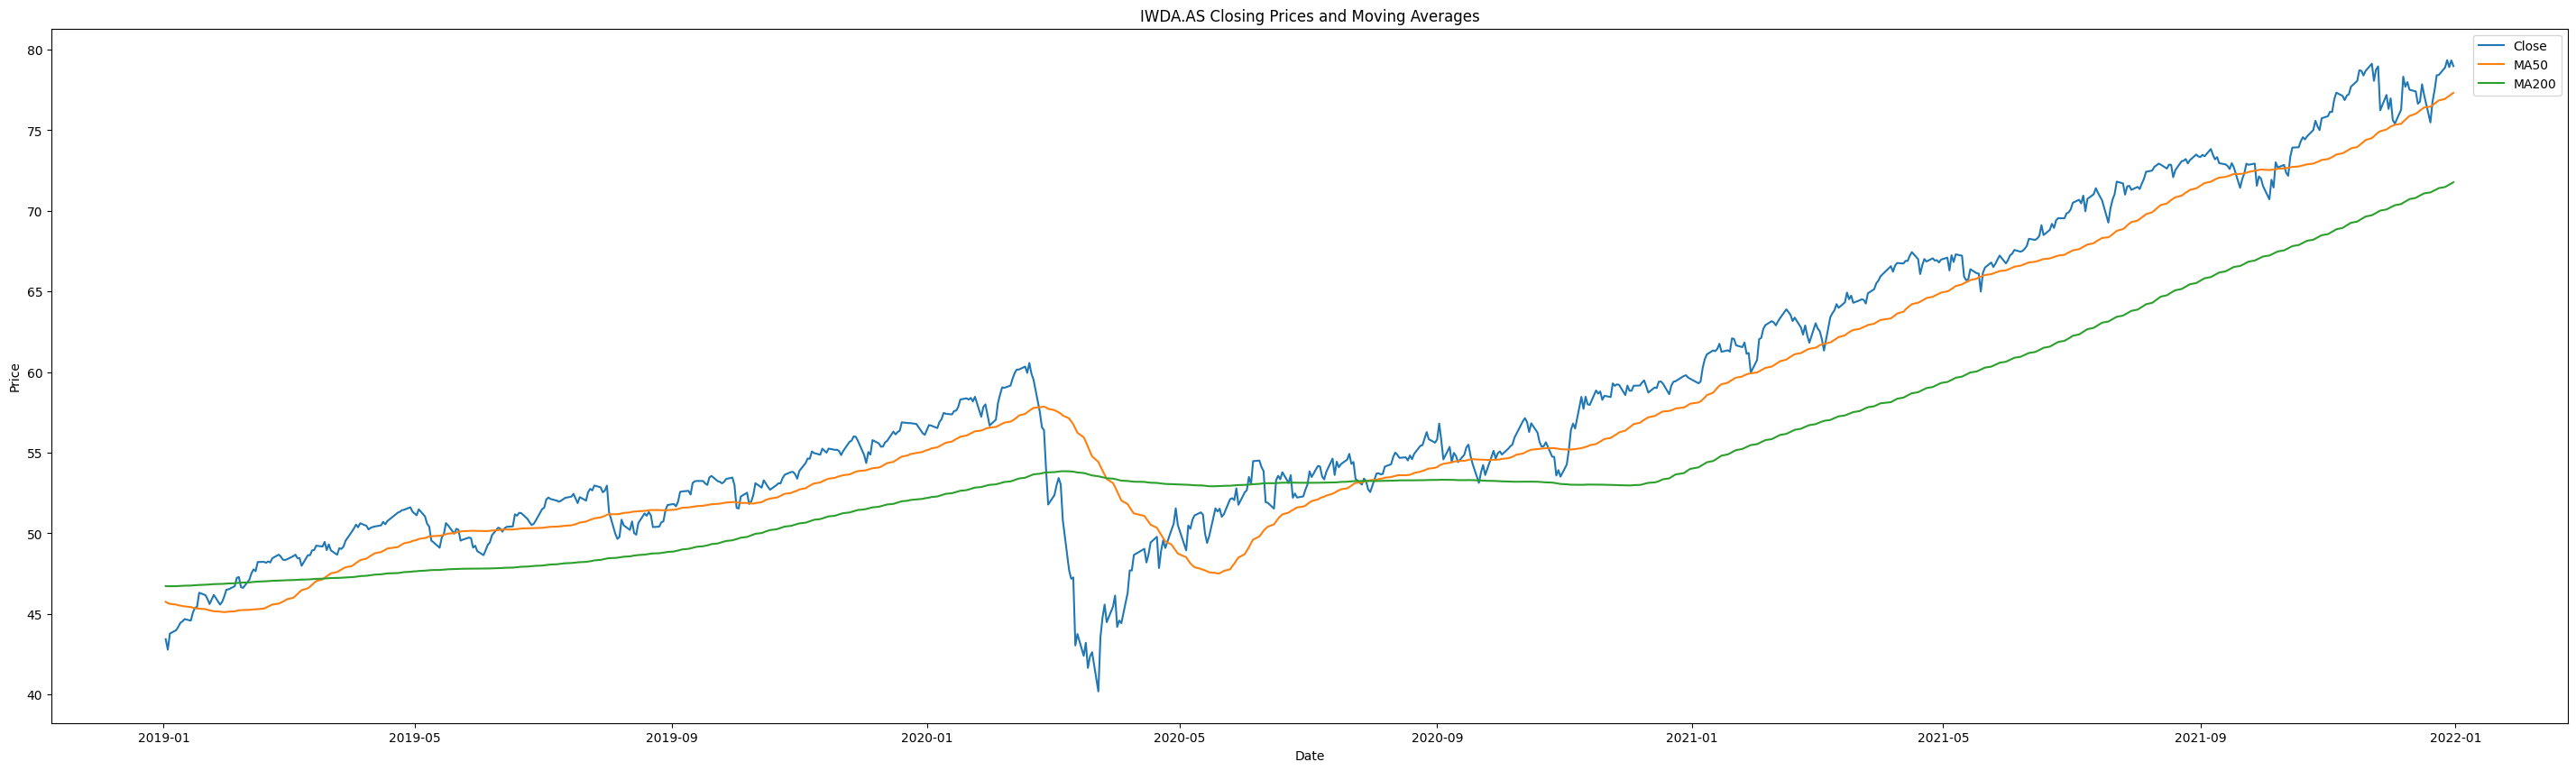

In [25]:
# data['MA7'] = data['Close'].rolling(7).mean()
data['MA50'] = data['Close'].rolling(50).mean()
data['MA200'] = data['Close'].rolling(200).mean()

# Filter data for the year 2024
data_2024 = data.loc['2019':'2021']

# Plot the data
plt.figure(figsize=[36, 10])
plt.plot(data_2024.index, data_2024['Close'], label='Close')
# plt.plot(data_2024.index, data_2024['MA7'], label='MA7')
plt.plot(data_2024.index, data_2024['MA50'], label='MA50')
plt.plot(data_2024.index, data_2024['MA200'], label='MA200')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('IWDA.AS Closing Prices and Moving Averages')
plt.legend()
plt.show()

In [36]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

# Assuming 'data' is already loaded with your DataFrame and 'MA50' and 'MA200' are calculated

# Filter data for the year 2024
data_2024 = data.loc['2009':'2024']

# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=data_2024.index, y=data_2024['Close'], mode='lines', name='Close'))
fig.add_trace(go.Scatter(x=data_2024.index, y=data_2024['MA50'], mode='lines', name='MA50'))
fig.add_trace(go.Scatter(x=data_2024.index, y=data_2024['MA200'], mode='lines', name='MA200'))

# Update layout
fig.update_layout(
    title='IWDA.AS Closing Prices and Moving Averages',
    xaxis_title='Date',
    yaxis_title='Price',
    width=1500,
    height=950
)

# Show plot
fig.show()
